#### Simulate a fluid

We begin with the 1D Burgers' equation:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}
$$

Discretize in time and space:

- Time:  $$ \frac{\partial u}{\partial t} \approx \frac{u_i^{n+1} - u_i^n}{\Delta t} $$
- Advection:  $$ u \frac{\partial u}{\partial x} \approx u_i^n \cdot \frac{u_i^n - u_{i-1}^n}{\Delta x} $$
- Diffusion:  $$ \frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2} $$

Now substitute into the PDE:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t}
+ u_i^n \cdot \frac{u_i^n - u_{i-1}^n}{\Delta x}
= \nu \cdot \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}
$$

Finally, solve for \( u_i^{n+1} \):

$$
u_i^{n+1} = u_i^n
- u_i^n \cdot \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)
+ \nu \cdot \frac{\Delta t}{\Delta x^2} (u_{i+1}^n - 2u_i^n + u_{i-1}^n)
$$


### Derivation of the Finite Difference Approximation for the Second Derivative

We want to approximate the second derivative:

$$
\frac{\partial^2 u}{\partial x^2} \Big|_{x_i}
$$

We use Taylor expansions around $ x_i $.

---

**Taylor expansion of** $ u_{i+1} = u(x_i + \Delta x) $:

$$
u_{i+1} = u_i + \Delta x \cdot u'_i + \frac{\Delta x^2}{2} u''_i + \frac{\Delta x^3}{6} u'''_i + \frac{\Delta x^4}{24} u^{(4)}_i + \cdots
$$

**Taylor expansion of** $ u_{i-1} = u(x_i - \Delta x) $:

$$
u_{i-1} = u_i - \Delta x \cdot u'_i + \frac{\Delta x^2}{2} u''_i - \frac{\Delta x^3}{6} u'''_i + \frac{\Delta x^4}{24} u^{(4)}_i - \cdots
$$

---

**Add both expansions**:

$$
u_{i+1} + u_{i-1} = 2u_i + \Delta x^2 \cdot u''_i + \mathcal{O}(\Delta x^4)
$$

Solve for the second derivative:

$$
u''_i \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}
$$

---

### Final Result:

$$
\boxed{
\frac{\partial^2 u}{\partial x^2} \Big|_{x_i} \approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}
}
$$


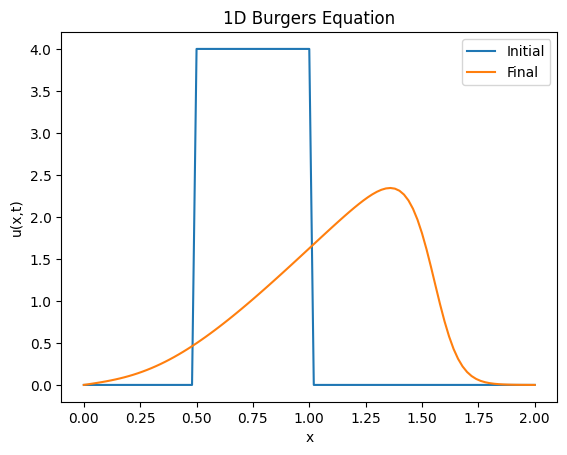

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx = 101            # number of spatial grid points
nt = 200            # number of time steps
dx = 2.0 / (nx - 1) # spatial step size
nu = .08         # viscosity
dt = dx * nu        # time step (for stability)


x = np.linspace(0, 2, nx)

u = np.zeros(nx)
u[int(0.5 / dx):int(1 / dx + 1)] = 4

u_initial = u.copy()

for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = (un[i] - un[i] * dt / dx * (un[i] - un[i - 1]) +
                nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1]))

plt.plot(x, u_initial, label='Initial')
plt.plot(x, u, label='Final')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('1D Burgers Equation')
plt.show()

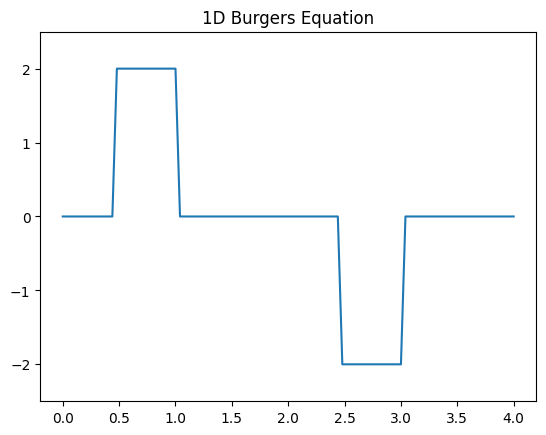

In [23]:
#Now animating this thing

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Parameters
nx = 101            # number of spatial grid points
nt = 500            # number of time steps
dx = 4.0 / (nx - 1) # spatial step size
nu = .07        # viscosity
dt = 1 * dx * nu        # time step (for stability)


x = np.linspace(0, 4, nx)

u = np.zeros(nx)
u[int(0.5 / dx):int(1 / dx + 1)] = 2
u[int(2.5 / dx):int(3 / dx + 1)] = -2

u_history = [u.copy()]

for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = (un[i] - un[i] * dt / dx * (un[i] - un[i - 1]) +
                nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1]))
    u_history.append(u.copy())

fig, ax = plt.subplots()
line, = ax.plot(x, u_history[0])
ax.set_ylim(-2.5, 2.5)
ax.set_title('1D Burgers Equation')

def animate(n):
    line.set_ydata(u_history[n])
    ax.set_title(f'Time Step: {n}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(u_history), interval=50)
plt.show()

ani.save("burgers_animation.gif", writer="pillow")

#### Heat Diffusion is 1D

Again we start with the differential equation,

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial t^2}
$$

Making the same manipulation as above, where n is the time part and i is the spatial point.

$$
u_i^{n+1}-u_i^{n} = \alpha \Delta t \frac{u_{i+1}^n-2u_{i}^n+u_{i-1}^n}{\Delta x^2} \rightarrow u_i^{n+1} = \alpha \Delta t \frac{u_{i+1}^n-2u_{i}^n+u_{i-1}^n}{\Delta x^2} + u_i^{n}
$$

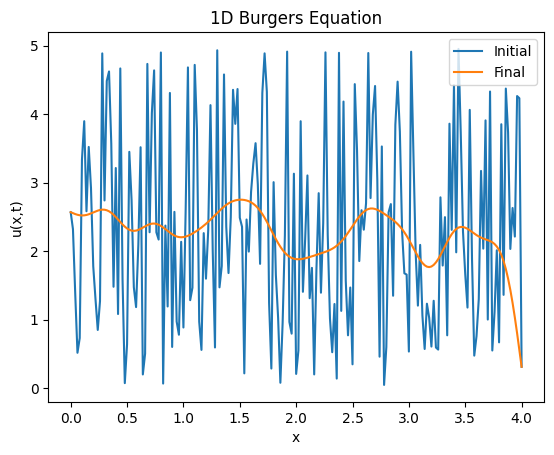

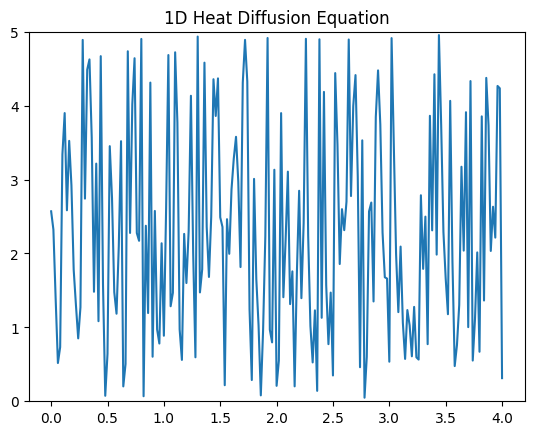

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Parameters
nx = 201            # number of spatial grid points
nt = 500            # number of time steps
L = 4               # length of the thing
dx = 4.0 / (nx - 1) # spatial step size
a = 100             # heat transfer
dt = .0005         # time step


x = np.linspace(0, L, nx)

v = 5*np.random.rand(nx)


v_initial = v.copy()
v_history = [v.copy()]

for n in range(nt):
    vn = v.copy()
    for i in range(1, nx-1):
        v[i] = vn[i] + a * dt * (vn[i+1]-2*vn[i]+vn[i-1])
    v_history.append(v.copy())

plt.plot(x, v_initial, label='Initial')
plt.plot(x, v, label='Final')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('1D Burgers Equation')
plt.show()

fig, ax = plt.subplots()
line, = ax.plot(x, v_history[0])
ax.set_ylim(0, 5)
ax.set_title('1D Heat Diffusion Equation')

def animate(n):
    line.set_ydata(v_history[n])
    ax.set_title(f'Time Step: {n}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(v_history), interval=50)
plt.show()

ani.save("heat_animation.gif", writer="pillow")

#### Now I will try to simulate 2d heat transfer equation and the other guy